# PSF Modeling for Hyper CAT

This is the example notebook to run the PSF modeling and convolution

First, it is necessary to run HtperCAT to obtain the desired CLUMPY image with the specific pixel-scale

In [1]:
#regular HyperCAT running process
import hypercat
import numpy as N
import pylab as p
cmap = p.cm.viridis

#Loading the CLUMPY image
DIR = '/Users/elopezrodriguez/Documents/Projects/Omaira_clumpy/'
M = hypercat.ModelCube(hdffile=DIR+'clumpy_img_cube_Enrique_Omaira.hdf5')
wavelength = 1.25                             ### This is a user defined parameter that will be used in PSF_modeling
group = (52.0,58.2,13.2,6.3,0.39,70.9,wavelength)
image = M.get_image(group)

### Example with NGC 1068
#Distance is 17.1 Mpc, with an angular scale of 0.0122 "/pc
#Let's assume that our CLUMPY image has 10 px per pc, then 
pxscale = 0.001   #"/px

Second, once the CLUMPY image is loaded and scaled with the specific pixel scale, then we can run PSF_modeling in two steps.

In [2]:
#Specific steps to run PSF Modeling
import PSF_modeling

__author__ = 'Enrique Lopez Rodriguez <enloro@gmail.com>'
__version__ = '20160908'  #yyyymmdd

#Defined plots routines
import matplotlib
%matplotlib inline

def imaplot(ax,data,title):
    ax.contourf(data,31,cmap=cmap)
    ax.set_title(title)
def cplots(ax,data,title):
    ax.contourf(p.log10(data),31,alpha=0.8,cmap=cmap)
    ax.set_title(title)
def lplots(ax,data,title):
    ax.plot(N.arange(len(data)),data[len(data)/2,:])    
    ax.set_yscale('log')
    ax.set_xlim([0,len(data)])
    ax.set_title(title)


# Let's assume telescope of 30-m with a Strehl of 0.8 at 1.25 um

Telescope Diameter [m]= 30.0
Angular Resolution ["] = 0.0104851375
Angular resolution [px] = 10.4851375


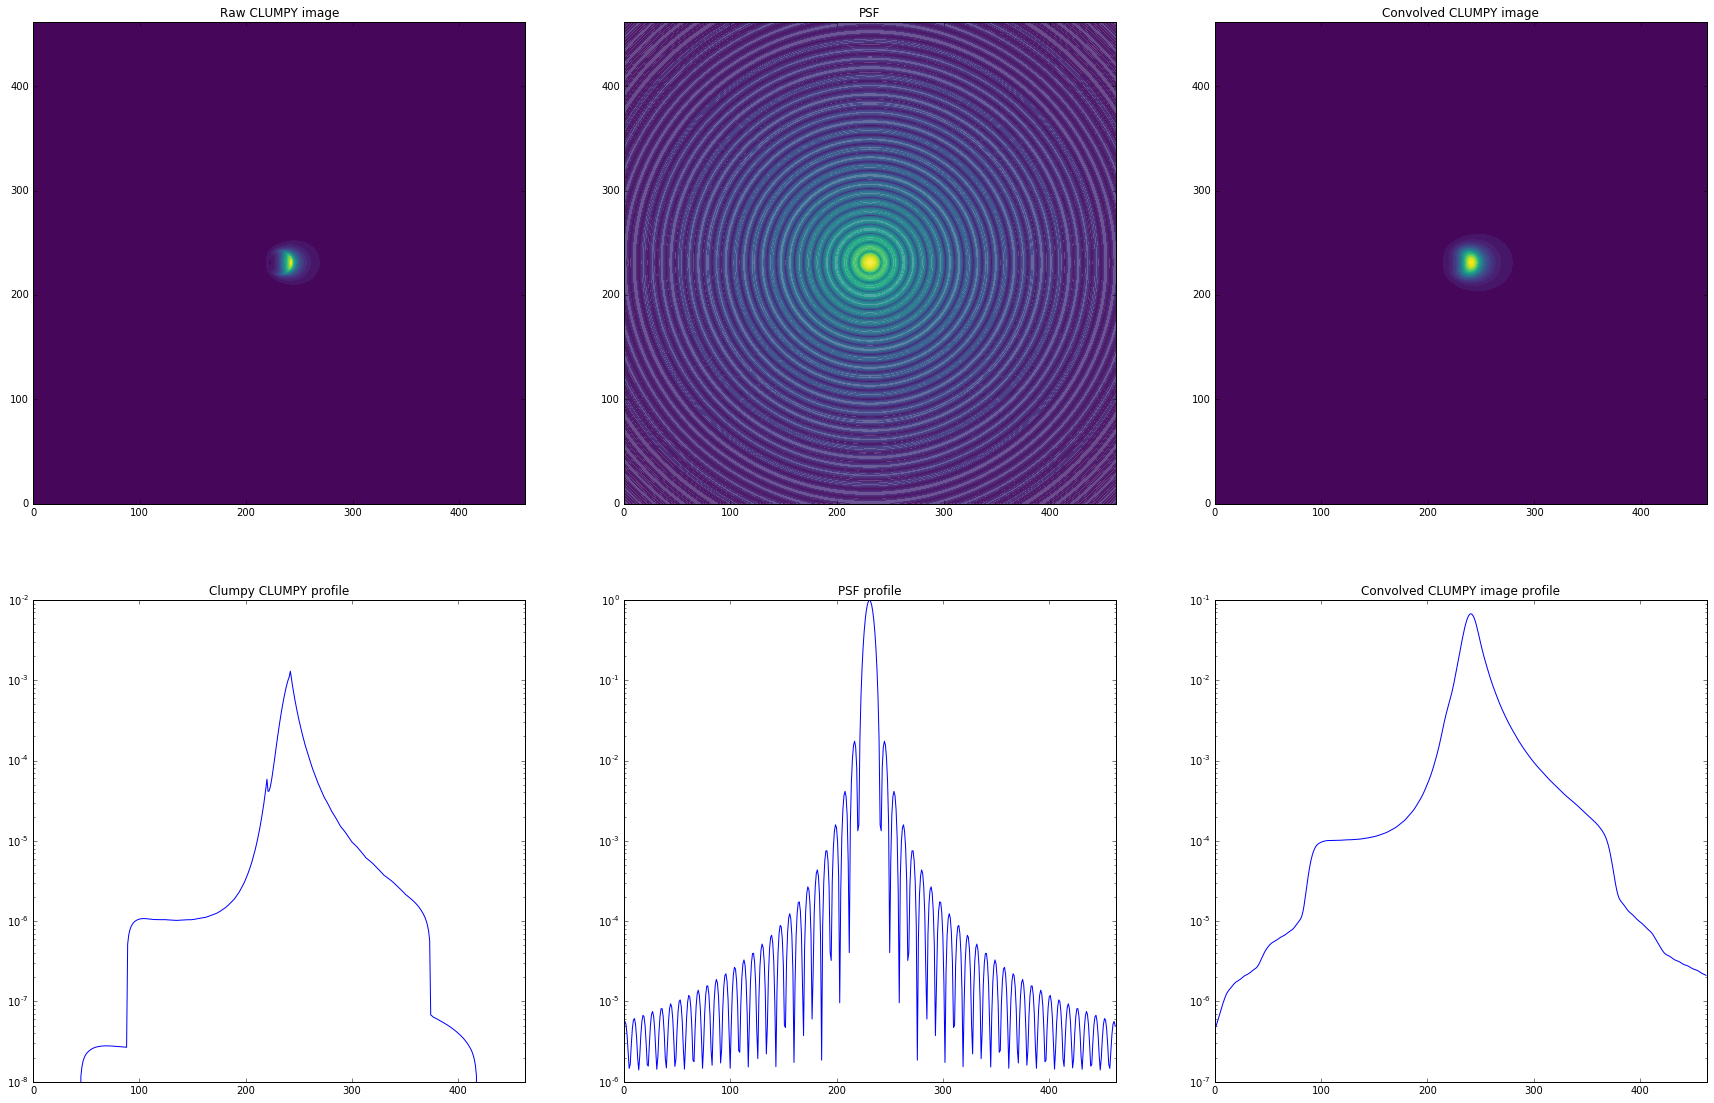

In [3]:
# User inputs
wavelength = wavelength # Wavelength in microns ### Note that wavelength is already defined during HyperCAT 
diameter   = 30.0 # Diameter of the telescope in meters
strehl     = 0.8  # Strehl

### Step 1: This step creates the PSF
PSF = PSF_modeling.PSF_model(image,wavelength,diameter,pxscale,strehl)

### Step 2: This step convolve the CLUMPY image with the PSF
Result = PSF_modeling.PSF_conv(image,PSF)

# Example of Figures
fig,axs = p.subplots(2,3,figsize=(30,19),dpi=200)
plts = axs.flatten()

#Fist row - 2D images
imaplot(plts[0],image,'Raw CLUMPY image')
cplots(plts[1],PSF,'PSF')
imaplot(plts[2],Result,'Convolved CLUMPY image')

#Second row - 1D profilesl
lplots(plts[3],image,'Clumpy CLUMPY profile')
lplots(plts[4],PSF,'PSF profile')
lplots(plts[5],Result,'Convolved CLUMPY image profile')

# Let's now assume a telescope with a diameter of 8-m

Telescope Diameter [m]= 8.0
Angular Resolution ["] = 0.039319265625
Angular resolution [px] = 39.319265625


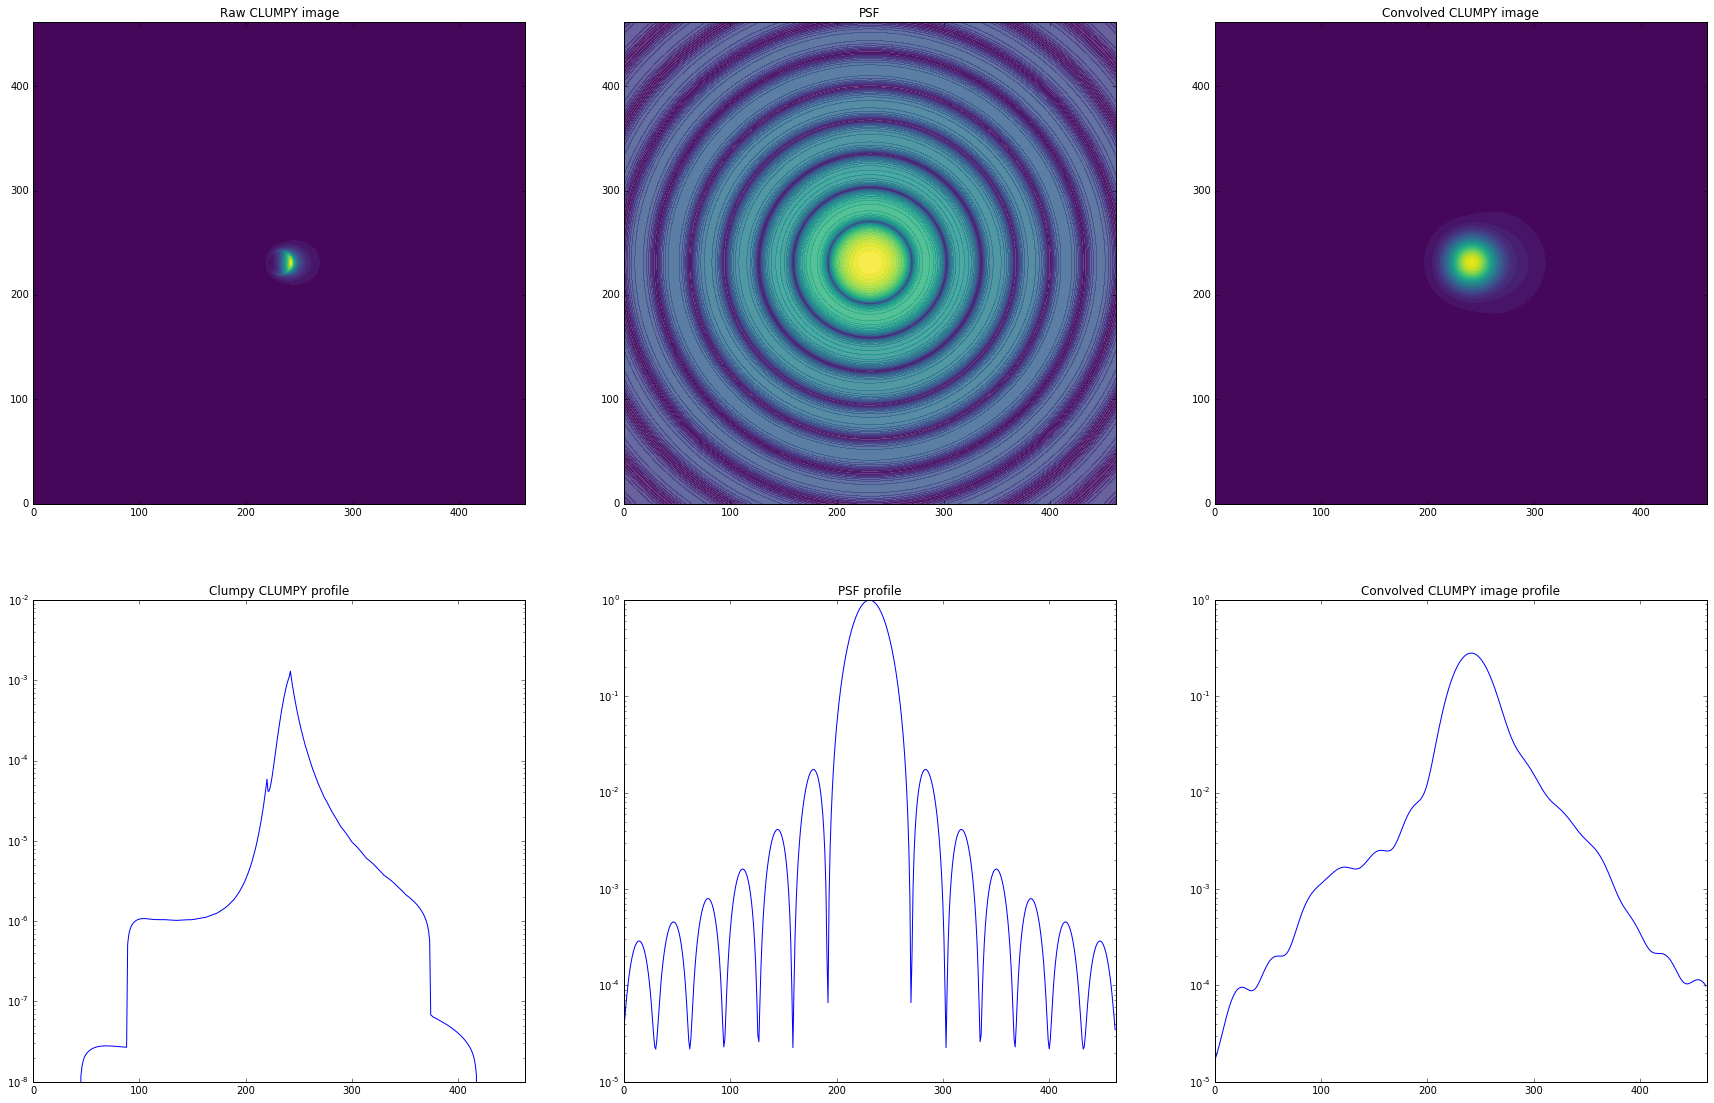

In [7]:
reload(PSF_modeling)
# User inputs
wavelength = wavelength # Wavelength in microns ### Note that wavelength is already defined during HyperCAT 
diameter   = 8.0 # Diameter of the telescope in meters
strehl     = 0.8  # Strehl

### Step 1: This step creates the PSF
PSF = PSF_modeling.PSF_model(image,wavelength,diameter,pxscale,strehl)

### Step 2: This step convolve the CLUMPY image with the PSF
Result = PSF_modeling.PSF_conv(image,PSF)

# Example of Figures
fig,axs = p.subplots(2,3,figsize=(30,19),dpi=200)
plts = axs.flatten()

#Fist row - 2D images
imaplot(plts[0],image,'Raw CLUMPY image')
cplots(plts[1],PSF,'PSF')
imaplot(plts[2],Result,'Convolved CLUMPY image')

#Second row - 1D profilesl
lplots(plts[3],image,'Clumpy CLUMPY profile')
lplots(plts[4],PSF,'PSF profile')
lplots(plts[5],Result,'Convolved CLUMPY image profile')

#NOTE: Careful with the interpretation of this convolution. The assumed strehl is 0.8, which is assuming
#perfect AO correction to the seeing. At 1.25 um, we are seeing limited and strehl does not work that good.
#Also, typical AO insttuments at 1-3 um provide angular resoltion >0.1", compared with the theoretical
#of ~0.04". 
#Pxscale shold be changed according to instrumentation capabilties to simulate the correct PSF.

# Let's now assume a telescope of 30-m with a Strehl of 0.1 at 1.25 um

Telescope Diameter [m]= 30.0
Angular Resolution ["] = 0.0104851375
Angular resolution [px] = 10.4851375


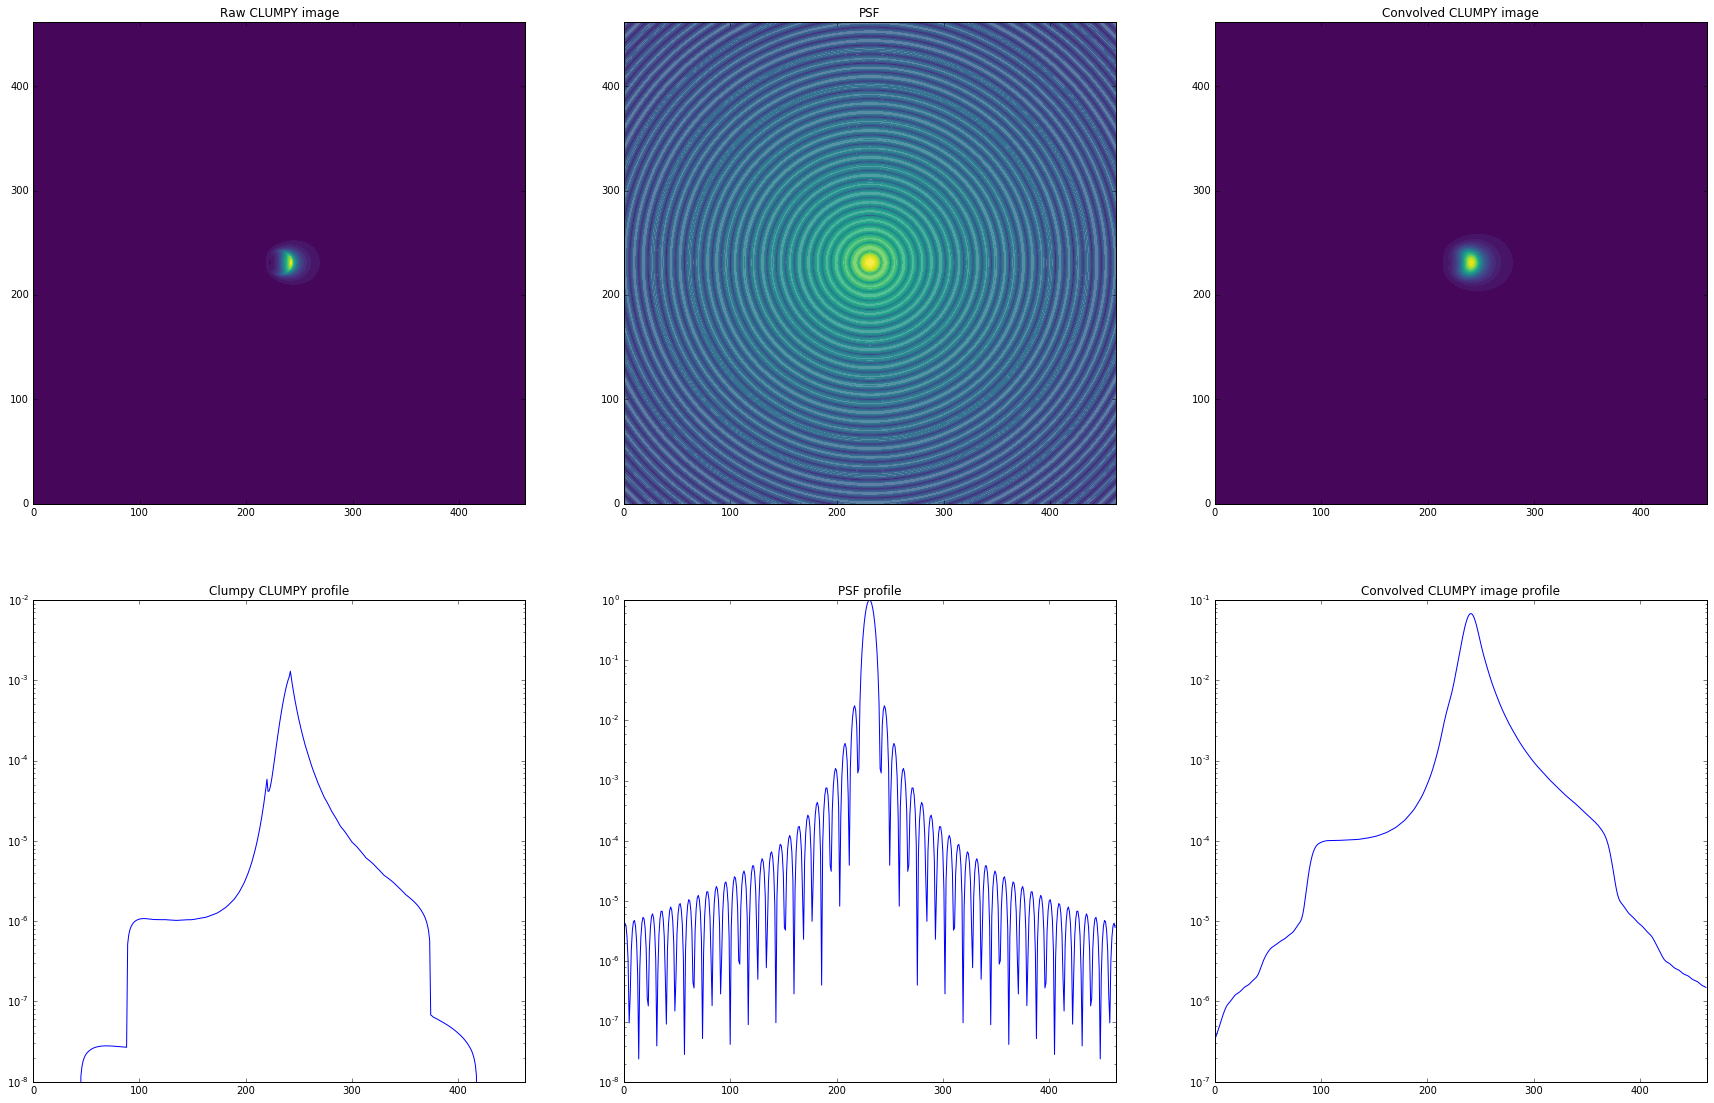

In [8]:
reload(PSF_modeling)
# User inputs
diameter   = 30.0 # Diameter of the telescope in meters
strehl     = 0.1  # Strehl

### Step 1: This step creates the PSF
PSF = PSF_modeling.PSF_model(image,wavelength,diameter,pxscale,strehl)

### Step 2: This step convolve the CLUMPY image with the PSF
Result = PSF_modeling.PSF_conv(image,PSF)

# Example of Figures
fig,axs = p.subplots(2,3,figsize=(30,19),dpi=200)
plts = axs.flatten()

#Fist row - 2D images
imaplot(plts[0],image,'Raw CLUMPY image')
cplots(plts[1],PSF,'PSF')
imaplot(plts[2],Result,'Convolved CLUMPY image')

#Second row - 1D profilesl
lplots(plts[3],image,'Clumpy CLUMPY profile')
lplots(plts[4],PSF,'PSF profile')
lplots(plts[5],Result,'Convolved CLUMPY image profile')

# Let's now assume a telescope of 30-m, strehl of 0.8 at 10 um 

Telescope Diameter [m]= 30.0
Angular Resolution ["] = 0.0838811
Angular resolution [px] = 83.8811


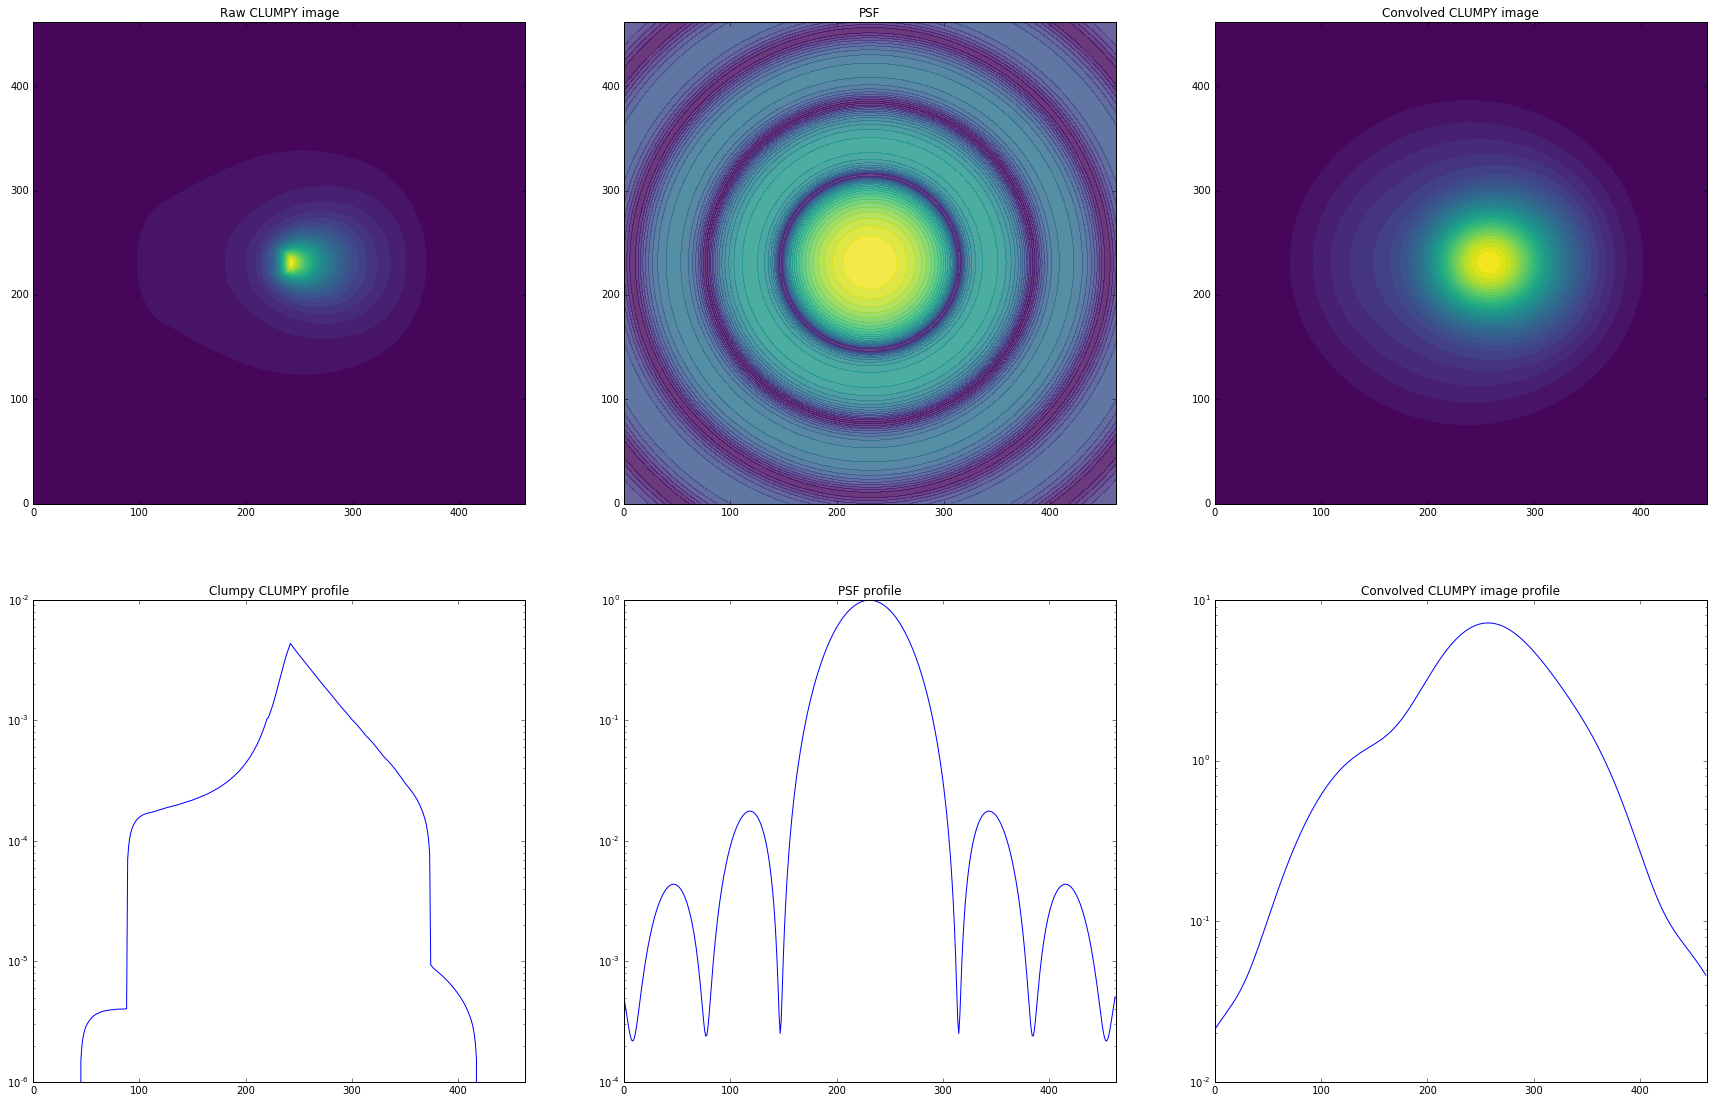

In [9]:
wavelength = 10.                             ### This is a user defined parameter that will be used in PSF_modeling
group = (52.0,58.2,13.2,6.3,0.39,70.9,wavelength)
image = M.get_image(group)

# User inputs
wavelength = wavelength # Wavelength in microns ### Note that wavelength is already defined during HyperCAT 
diameter   = 30.0  # Diameter of the telescope in meters
strehl     = 0.8   # Strehl

### Step 1: This step creates the PSF
PSF = PSF_modeling.PSF_model(image,wavelength,diameter,pxscale,strehl)

### Step 2: This step convolve the CLUMPY image with the PSF
Result = PSF_modeling.PSF_conv(image,PSF)

# Example of Figures
fig,axs = p.subplots(2,3,figsize=(30,19),dpi=200)
plts = axs.flatten()

#Fist row - 2D images
imaplot(plts[0],image,'Raw CLUMPY image')
cplots(plts[1],PSF,'PSF')
imaplot(plts[2],Result,'Convolved CLUMPY image')

#Second row - 1D profilesl
lplots(plts[3],image,'Clumpy CLUMPY profile')
lplots(plts[4],PSF,'PSF profile')
lplots(plts[5],Result,'Convolved CLUMPY image profile')

# Let's assume a telescope of 8-m at 10 um

Telescope Diameter [m]= 8.0
Angular Resolution ["] = 0.314554125
Angular resolution [px] = 314.554125


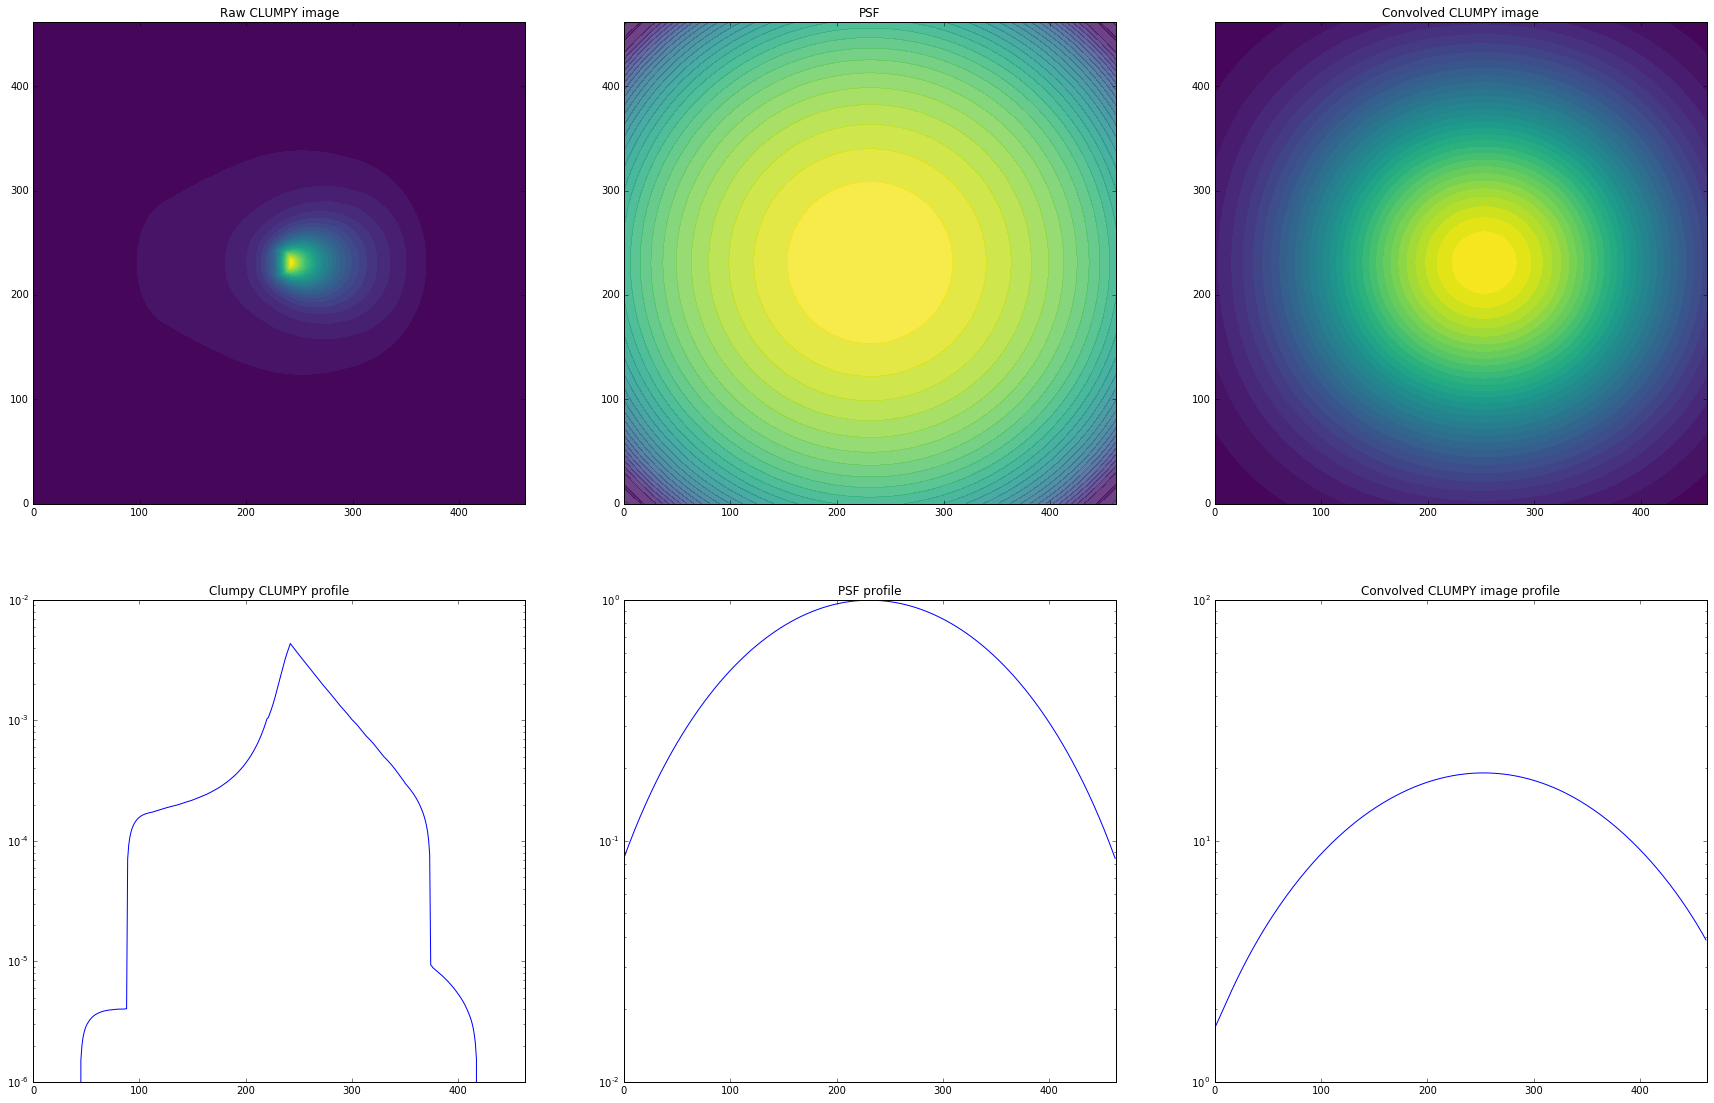

In [10]:
# User inputs
diameter   = 8.0  # Diameter of the telescope in meters

### Step 1: This step creates the PSF
PSF = PSF_modeling.PSF_model(image,wavelength,diameter,pxscale,strehl)

### Step 2: This step convolve the CLUMPY image with the PSF
Result = PSF_modeling.PSF_conv(image,PSF)

# Example of Figures
fig,axs = p.subplots(2,3,figsize=(30,19),dpi=200)
plts = axs.flatten()

#Fist row - 2D images
imaplot(plts[0],image,'Raw CLUMPY image')
cplots(plts[1],PSF,'PSF')
imaplot(plts[2],Result,'Convolved CLUMPY image')

#Second row - 1D profilesl
lplots(plts[3],image,'Clumpy CLUMPY profile')
lplots(plts[4],PSF,'PSF profile')
lplots(plts[5],Result,'Convolved CLUMPY image profile')